# 📌 Outliers in Machine Learning
#### Outliers are data points that are significantly different from the rest of the data.

### In simple words:
Values that lie far away from most observations.

### Example
```sh
Age: 22, 25, 28, 30, 27, 150
```

Here, 150 is an outlier.

## 🎯 Why Outliers Matter?
#### Outliers can:
<ul>
    <li>Distort mean and variance</li>
    <li>Mislead models</li>
    <li>Affect regression slope</li>
    <li>Reduce accuracy</li>
    <li>Increase error</li>
</ul>

#### Especially harmful for:
<ul>
    <li>Linear Regression</li>
    <li>KNN</li>
    <li>SVM</li>
</ul>

## 📊 Types of Outliers
### 1️⃣ Global Outliers
Clearly far from entire dataset.

### 2️⃣ Contextual Outliers
Abnormal in specific context.

#### Example:
```sh
30°C normal in summer, abnormal in winter.
```

### 3️⃣ Collective Outliers
A group of unusual data points together.

---

## 📌 Causes of Outliers
<ul>
    <li>Measurement error</li>
    <li>Data entry error</li>
    <li>Natural variation</li>
    <li>Fraudulent activity</li>
    <li>Rare events</li>
</ul>

---

# 🔎 How to Detect Outliers

## 1️⃣ Using IQR Method (Boxplot Method)
```sh
IQR = Q3 − Q1
```

Outlier condition:
```sh
X < Q1 − 1.5(IQR)
X > Q3 + 1.5(IQR)
```
### Python Example:
```sh
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
```

--- 

## 2️⃣ Z-Score Method
#### Measures how many standard deviations a value is from mean.
```sh
Z = (X − μ) / ​σ
```

#### If: ∣𝑍∣ > 3
→ Outlier.

---

## 3️⃣ Visualization Methods
<ul>
    <li>Boxplot</li>
    <li>Scatter plot</li>
    <li>Histogram</li>
    <li>Density plot</li>
</ul>

---

# 📌 How to Handle Outliers

## 1️⃣ Remove Them
```sh
df = df[(df['Age'] < upper) & (df['Age'] > lower)]
```

✔ Simple <br/>
❌ Data loss

---

## 2️⃣ Capping (Winsorization)
#### Replace extreme values with boundary values.
### Example:
```sh
if X > upper → X = upper
```
#### Preserves data size.

--- 

## 3️⃣ Transformation
#### Apply:
<ul>
    <li>Log</li>
    <li>Square root</li>
    <li>Box-Cox</li>
    <li>Reduces skewness.</li>
</ul>

---

## 4️⃣ Use Robust Models
#### Tree-based models:
<ul>
    <li>Decision Tree</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
</ul>

#### Are less sensitive to outliers.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./outlier_practice_dataset.csv')

In [5]:
df.shape

(200, 3)

In [6]:
df.head()

,age,salary,experience_years
0,5.0,54293.448324,1.622289
1,90.0,56729.414316,5.602500
2,120.0,62996.614918,8.020975
3,2.0,62645.624624,8.187922
4,85.0,33467.967585,6.199738


/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


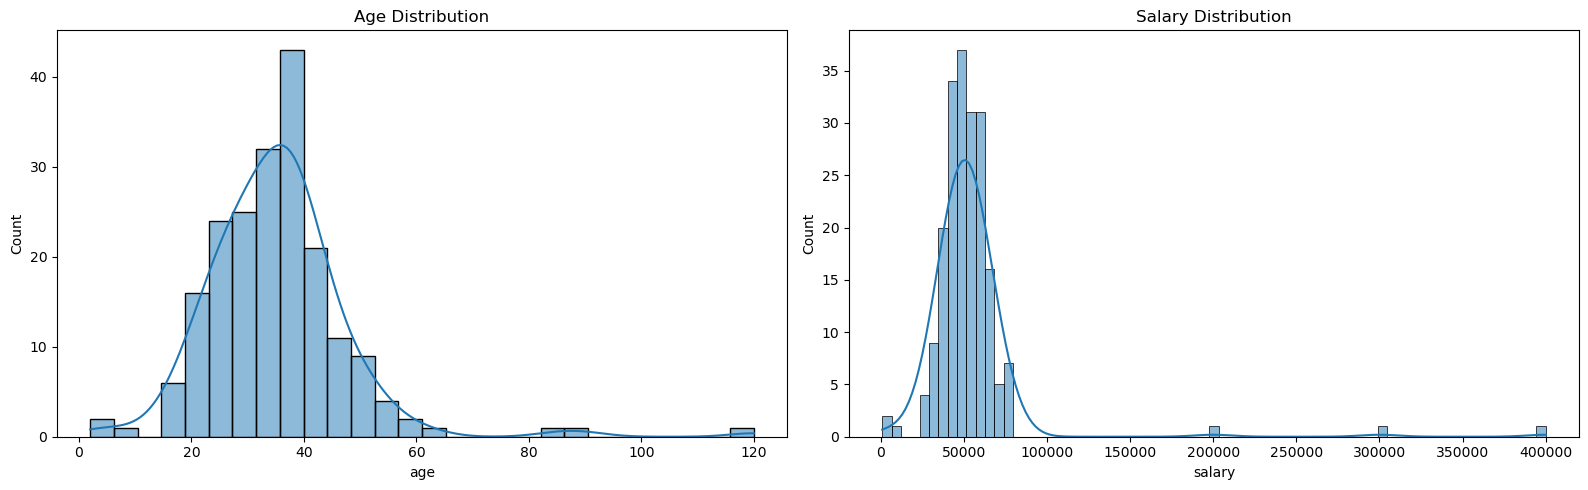

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df['salary'], kde=True, ax=axes[1])
axes[1].set_title("Salary Distribution")

plt.tight_layout()
plt.show()


In [17]:
print(df['age'].skew())
print(df['salary'].skew())

2.0893231206227605
7.389604590916957


In [18]:
df['salary'].describe()

count       200.000000
mean      54042.891721
std       34320.894088
min        1000.000000
25%       42440.903279
50%       50873.639859
75%       59002.550108
max      400000.000000
Name: salary, dtype: float64

<Axes: >

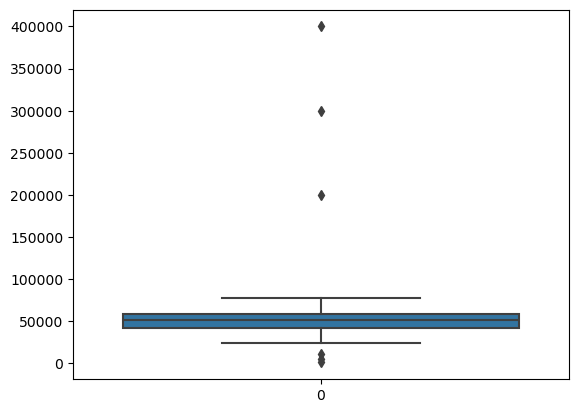

In [19]:
sns.boxplot(df['salary'])

<Axes: >

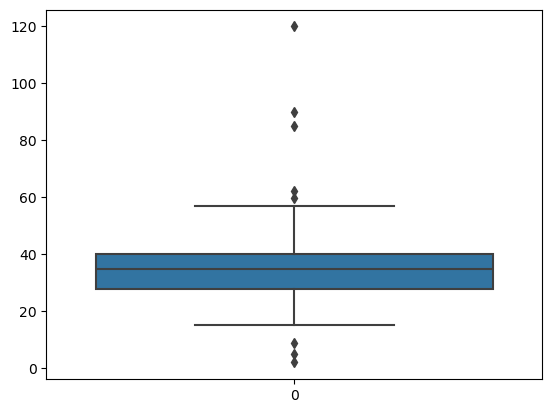

In [20]:
sns.boxplot(df['age'])

In [22]:
# Finding IQR

percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)

In [23]:
percentile75

40.15435966239241

In [24]:
IQR = percentile75 - percentile25

In [25]:
IQR

12.437531636246447

In [26]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [27]:
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  58.81065711676208
Lower limit:  9.06053057177629


# Finding Outliers

In [28]:
df[df['age'] > upper_limit]

,age,salary,experience_years
1,90.000000,56729.414316,5.602500
2,120.000000,62996.614918,8.020975
4,85.000000,33467.967585,6.199738
113,59.632421,59762.115632,4.369745
179,62.201692,40300.420576,12.575016


In [29]:
df[df['age'] < lower_limit]

,age,salary,experience_years
0,5.000000,54293.448324,1.622289
3,2.000000,62645.624624,8.187922
74,8.802549,38221.896187,14.579871


## Removing outlier(Trimming)

In [33]:
new_df = df[(df['age'] < upper_limit) & (df['age'] > lower_limit)]

In [35]:
new_df.shape

(192, 3)

/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


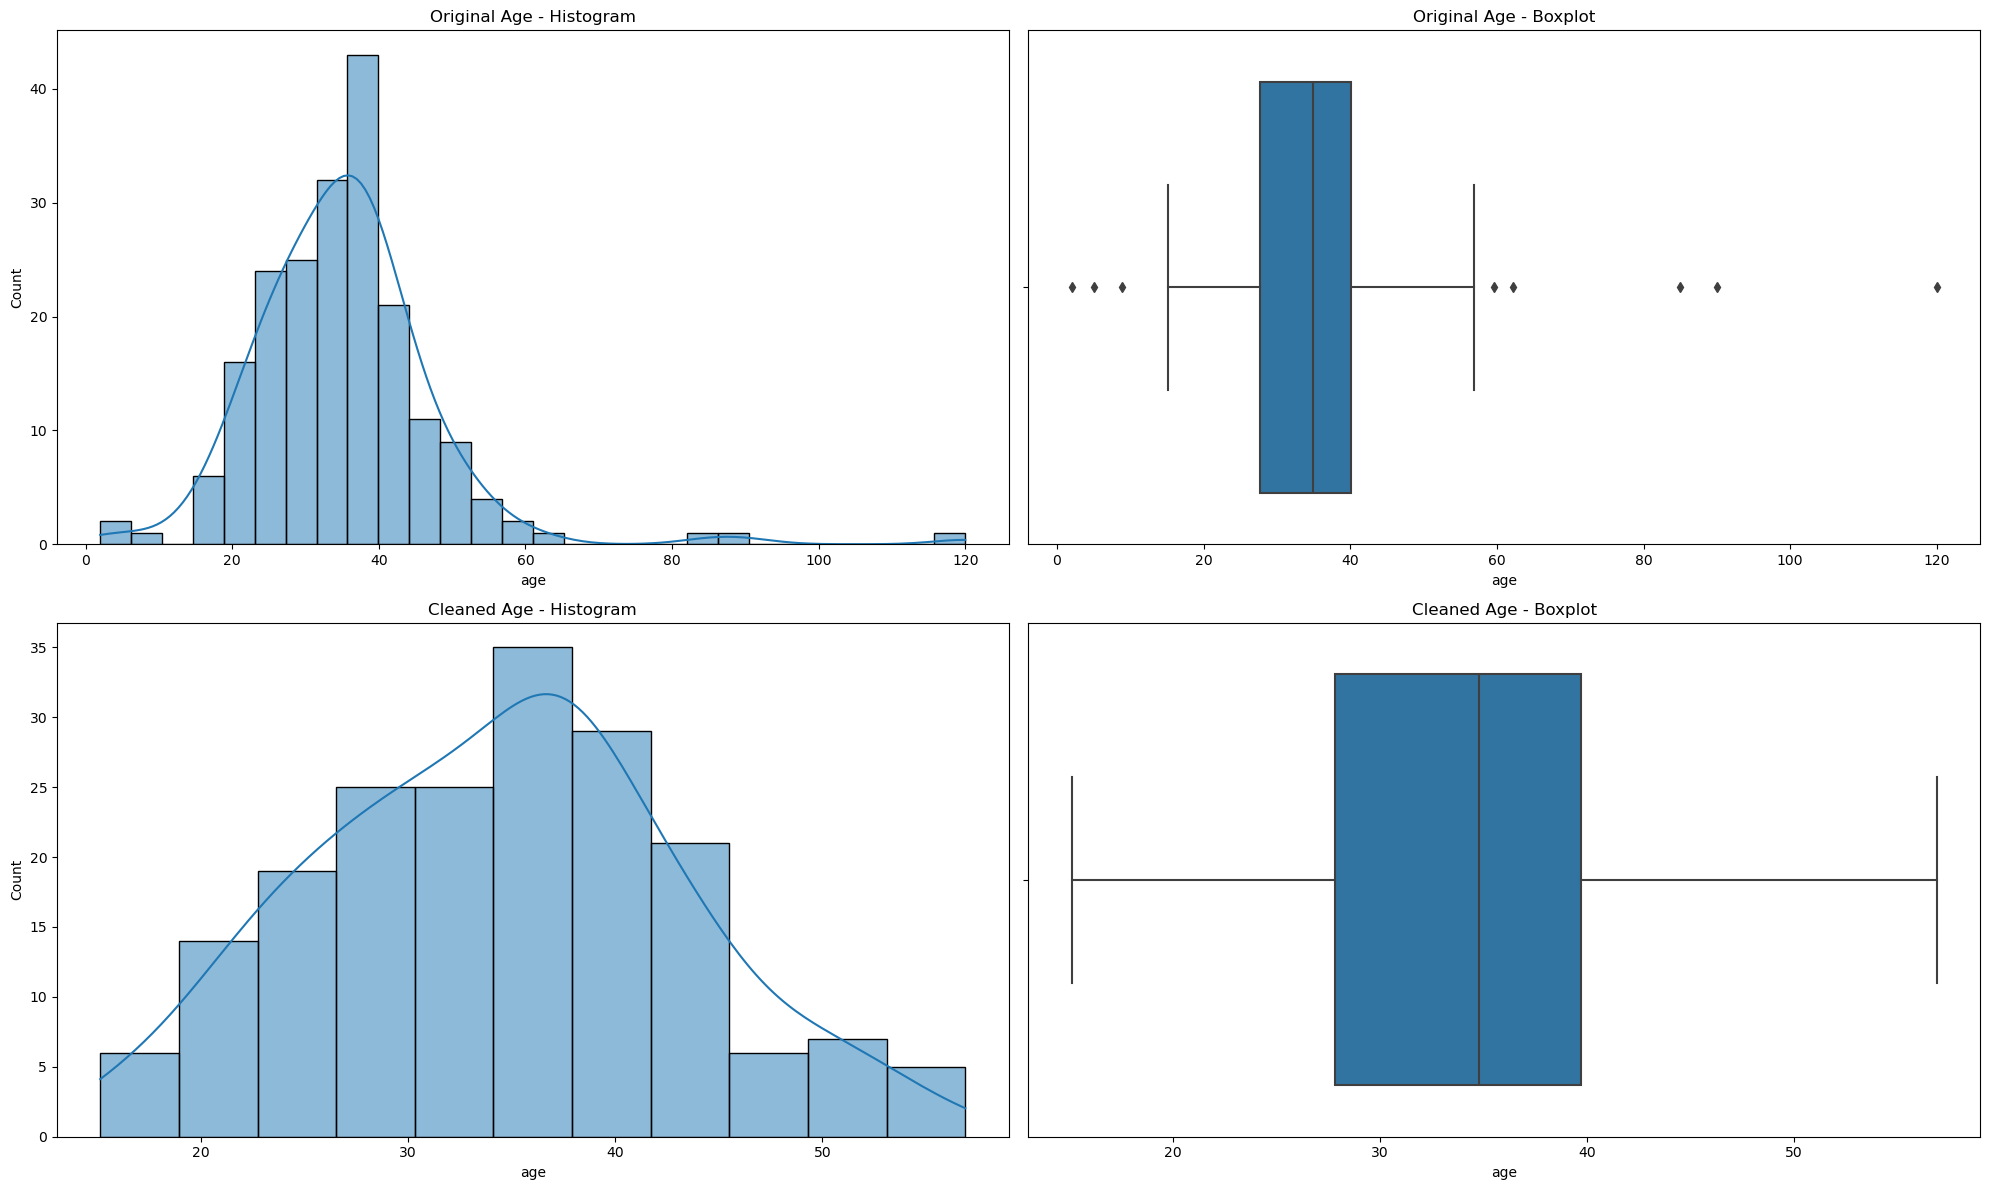

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Row-1
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Original Age - Histogram")

sns.boxplot(x=df['age'], ax=axes[0,1])
axes[0,1].set_title('Original Age - Boxplot')

# Row -2
sns.histplot(new_df['age'], kde=True, ax=axes[1,0])
axes[1, 0].set_title('Cleaned Age - Histogram')

sns.boxplot(x=new_df['age'], ax=axes[1,1])
axes[1, 1].set_title('Cleaned Age - Boxplot')

plt.tight_layout()
plt.show()

# Capping
np.where(condition, true, false)

In [51]:
new_df_cap = df.copy()

new_df_cap['age'] = np.where(
    new_df_cap['age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['age'] < lower_limit,
        lower_limit,
        new_df_cap['age']
    )
)

In [52]:
new_df_cap.shape

(200, 3)

/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/coderashim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


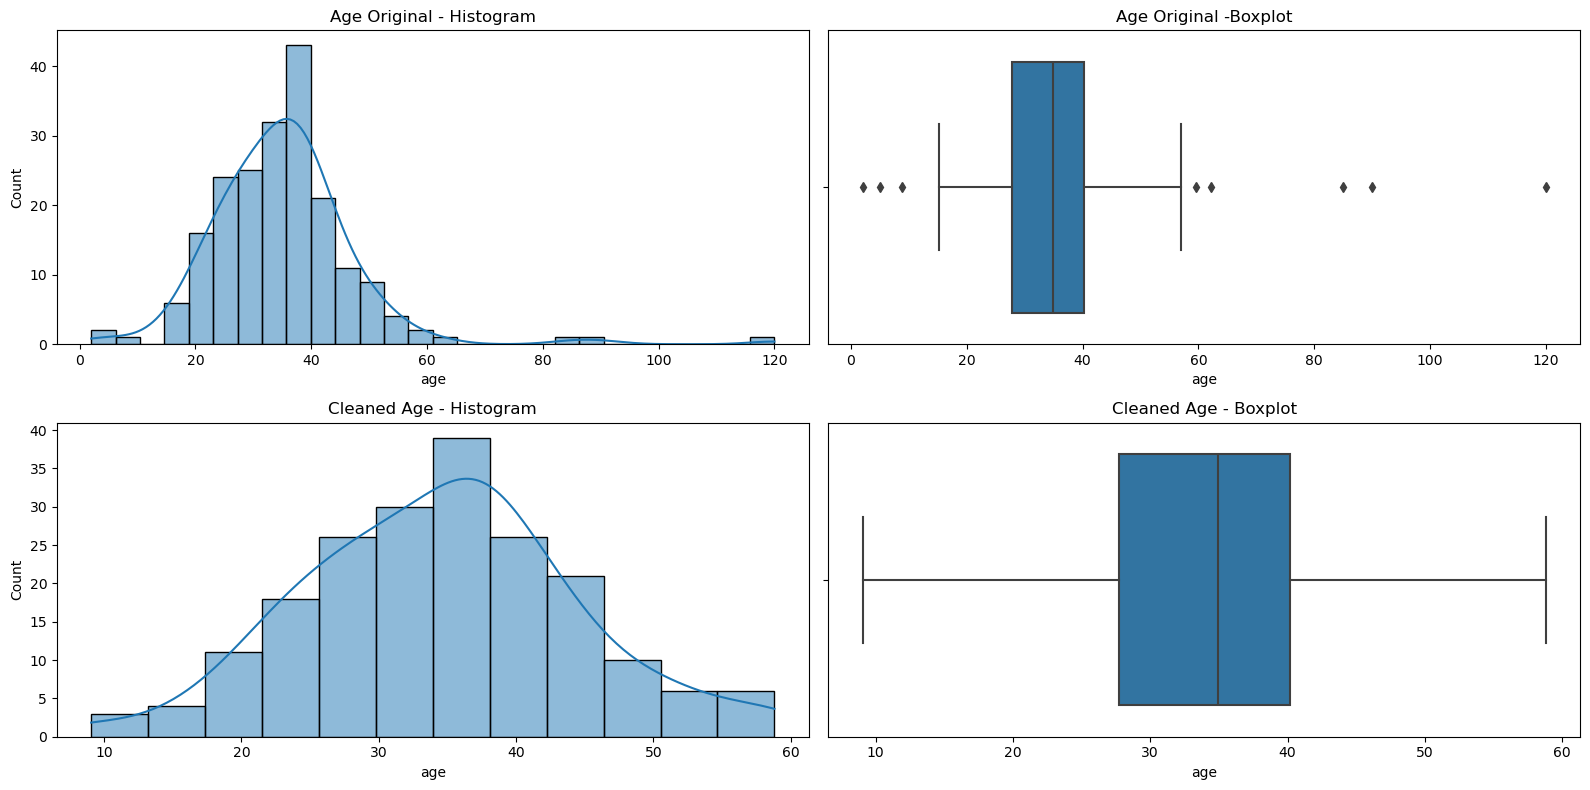

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Row-1
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Original - Histogram')

sns.boxplot(x=df['age'], ax=axes[0,1])
axes[0,1].set_title('Age Original -Boxplot')

# Row-2
sns.histplot(new_df_cap['age'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Cleaned Age - Histogram')

sns.boxplot(x=new_df_cap['age'], ax=axes[1,1])
axes[1,1].set_title('Cleaned Age - Boxplot')

plt.tight_layout()
plt.show()